In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv("taxi_trip_pricing.csv")

In [ ]:
dataset.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [ ]:
dataset.shape

(1000, 11)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [ ]:
dataset.isnull().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [ ]:
for col in ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']:
  dataset[col].fillna(dataset[col].mean(), inplace=True)


<ipython-input-7-e15c3e28b18c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].mean(), inplace=True)


In [ ]:
dataset.isnull().sum()

,0
Trip_Distance_km,0
Time_of_Day,50
Day_of_Week,50
Passenger_Count,0
Traffic_Conditions,50
Weather,50
Base_Fare,0
Per_Km_Rate,0
Per_Minute_Rate,0
Trip_Duration_Minutes,0


In [ ]:
for col in ['Time_of_Day','Day_of_Week','Traffic_Conditions','Weather']:
  dataset[col].fillna(dataset[col].mode()[0],inplace=True)

<ipython-input-9-27c588b27617>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].mode()[0],inplace=True)


In [ ]:
dataset.isnull().sum()

,0
Trip_Distance_km,0
Time_of_Day,0
Day_of_Week,0
Passenger_Count,0
Traffic_Conditions,0
Weather,0
Base_Fare,0
Per_Km_Rate,0
Per_Minute_Rate,0
Trip_Duration_Minutes,0


In [ ]:
dataset.duplicated().sum()

0

In [ ]:
# One-Hot Encoding for categorical columns
dataset = pd.get_dummies(dataset, columns=['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'], drop_first=True)
# Selectively convert dummy columns (created by get_dummies) to integers
for col in dataset.columns:
    if dataset[col].dtypes == 'bool':  # Check if the column is boolean
        dataset[col] = dataset[col].astype(int)


In [ ]:
dataset.head()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekend,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Rain,Weather_Snow
0,19.350000,3.0,3.560000,0.80,0.32,53.82,36.262400,0,1,0,0,1,0,0,0
1,47.590000,1.0,3.502989,0.62,0.43,40.57,56.874773,0,0,0,0,0,0,0,0
2,36.870000,1.0,2.700000,1.21,0.15,37.27,52.903200,1,0,0,1,0,0,0,0
3,30.330000,4.0,3.480000,0.51,0.15,116.81,36.469800,1,0,0,0,1,0,0,0
4,27.070547,3.0,2.930000,0.63,0.32,22.64,15.618000,1,0,0,0,0,0,0,0


In [ ]:
dataset.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekend,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Rain,Weather_Snow
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773,0.203000,0.283000,0.093000,0.295000,0.447000,0.371000,0.227000,0.056000
std,19.400775,1.074311,0.848107,0.418922,0.112662,31.339413,39.464810,0.402434,0.450682,0.290578,0.456271,0.497432,0.483314,0.419102,0.230037
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.107500,2.000000,2.770000,0.870000,0.197500,37.107500,34.578850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.995000,2.476842,3.502989,1.233316,0.292916,62.118116,52.617000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.782500,3.000000,4.202500,1.580000,0.382500,87.775000,67.476650,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trip_Distance_km           1000 non-null   float64
 1   Passenger_Count            1000 non-null   float64
 2   Base_Fare                  1000 non-null   float64
 3   Per_Km_Rate                1000 non-null   float64
 4   Per_Minute_Rate            1000 non-null   float64
 5   Trip_Duration_Minutes      1000 non-null   float64
 6   Trip_Price                 1000 non-null   float64
 7   Time_of_Day_Evening        1000 non-null   int64  
 8   Time_of_Day_Morning        1000 non-null   int64  
 9   Time_of_Day_Night          1000 non-null   int64  
 10  Day_of_Week_Weekend        1000 non-null   int64  
 11  Traffic_Conditions_Low     1000 non-null   int64  
 12  Traffic_Conditions_Medium  1000 non-null   int64  
 13  Weather_Rain               1000 non-null   int64 

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = dataset.drop(columns=['Trip_Price'])  # Replace 'Price' with your target column name
y = dataset['Trip_Price']  # Replace 'Price' with your target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Features Shape: (800, 14)
Testing Features Shape: (200, 14)
Training Target Shape: (800,)
Testing Target Shape: (200,)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train (fit) the model on the training data
model.fit(X_train, y_train)

# Print the model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: -55.819822917335266
Coefficients: [ 1.76474283  0.09768667  0.60531655 24.97634338 49.15662193  0.29015443
 -1.87985678  0.5194396  -2.69652783  0.4011359  -0.38047292 -1.25559264
 -0.50776228  3.18274868]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 9.87215086540654
Mean Squared Error (MSE): 194.7215560508451
R² Score: 0.7654985684729738


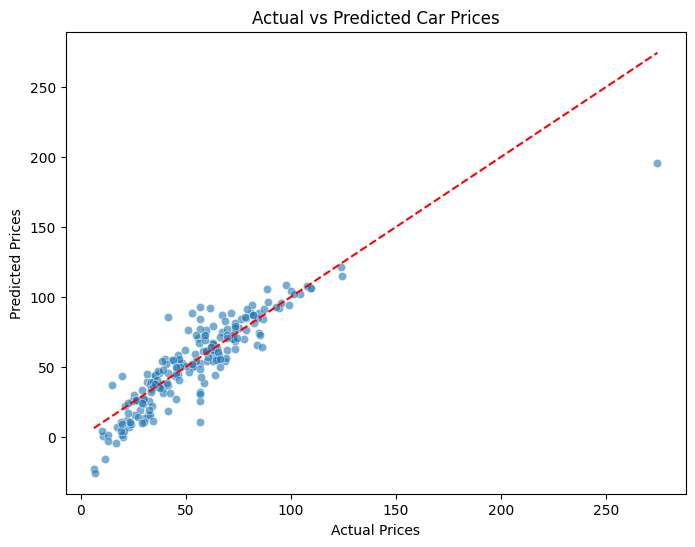

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  # 45-degree line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.show()


In [ ]:
residuals = y_test - y_pred

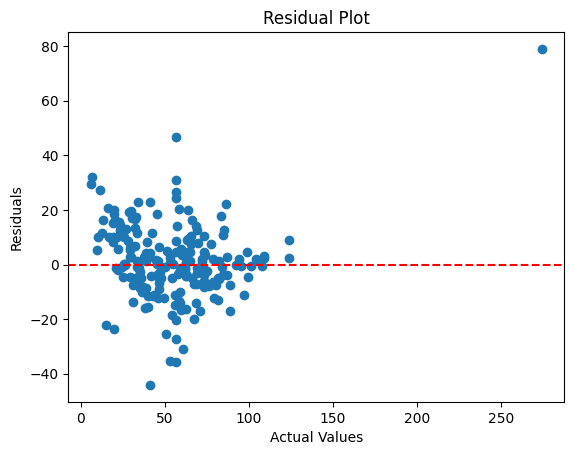

In [ ]:
import matplotlib.pyplot as plt

# Plot residuals
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title("Residual Plot")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()
